In [145]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML


In [146]:
weekly_df=pd.read_csv('/Users/staschernyshov/Desktop/Introduction to Statistical learning/ALL CSV FILES - 2nd Edition 2/Weekly.csv')
weekly_df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [147]:
weekly_df=pd.get_dummies(weekly_df).drop('Direction_Down',axis=1)
weekly_df.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


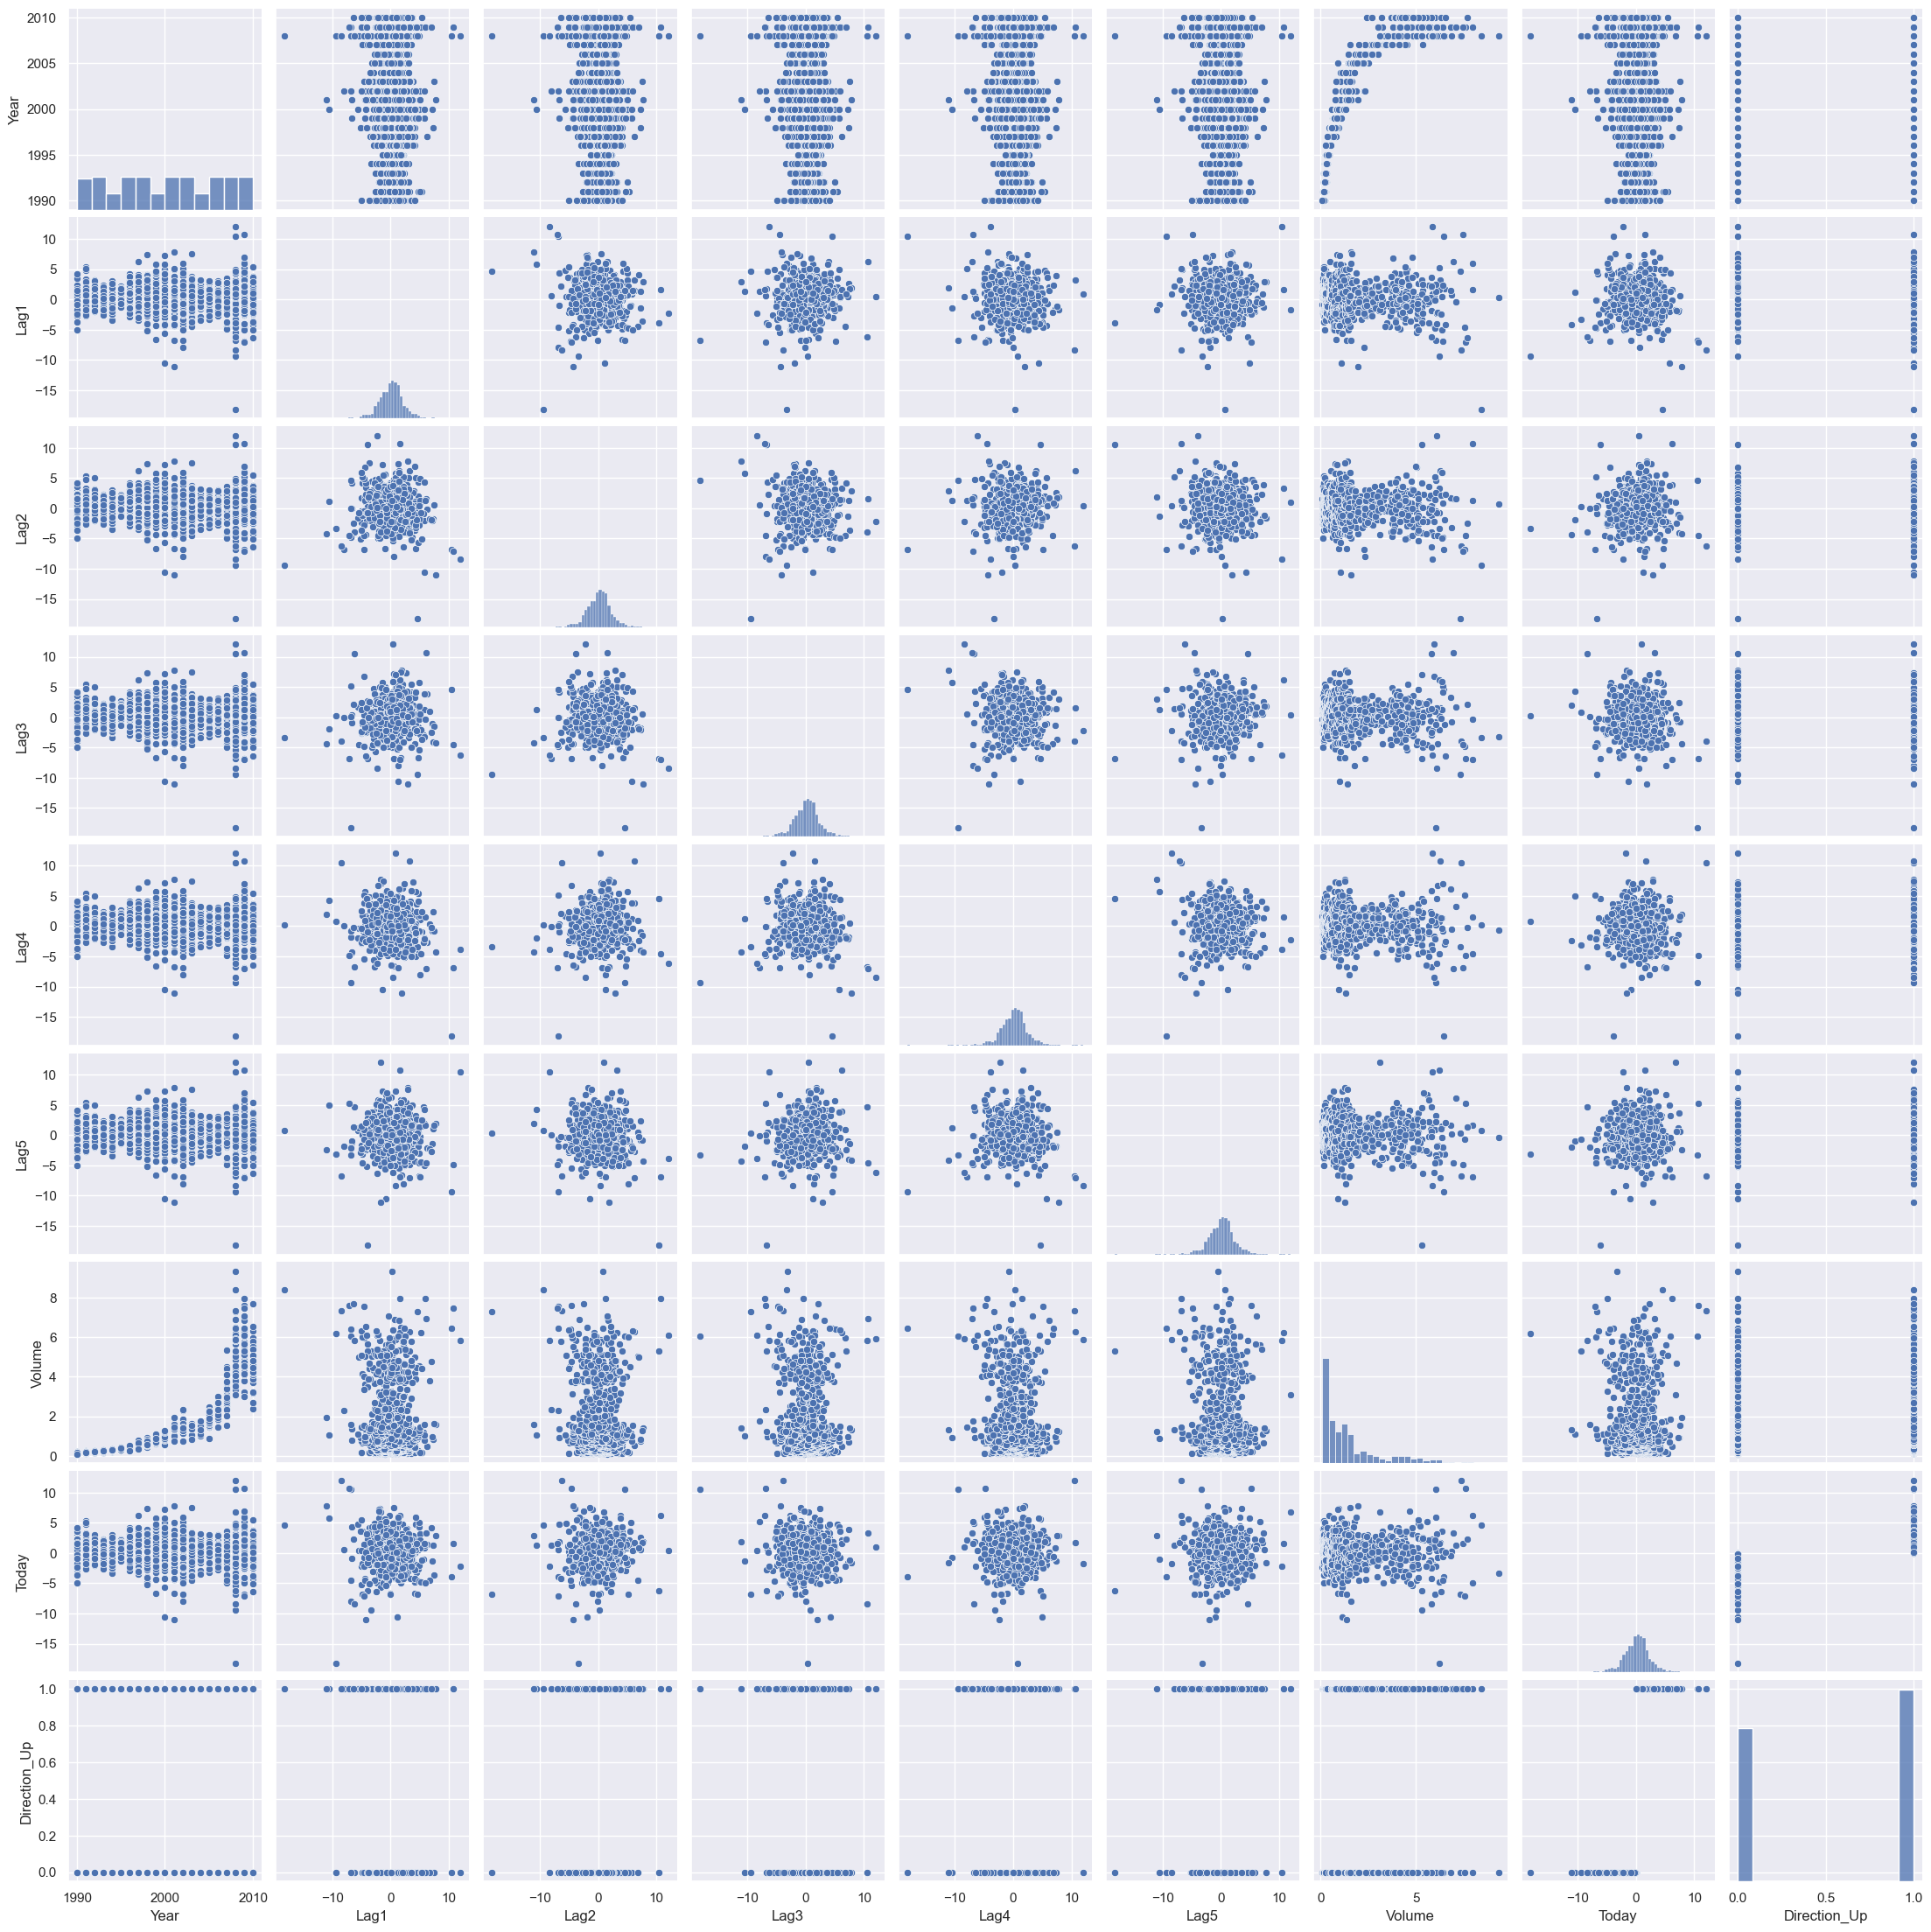

In [148]:
sns.pairplot(weekly_df)
plt.show()

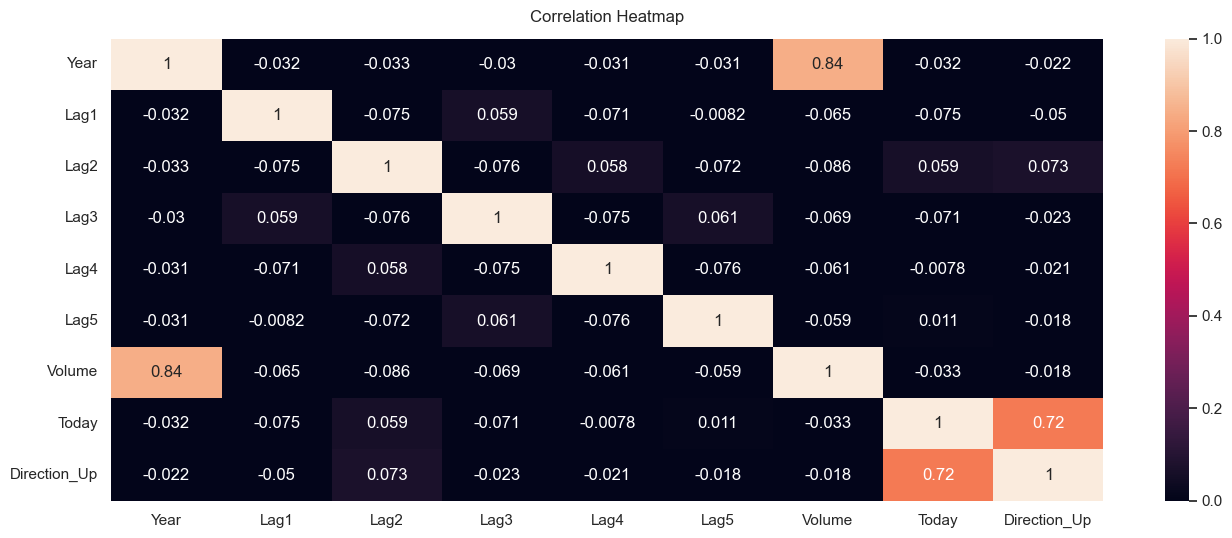

In [149]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(weekly_df.corr(), vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [150]:
f_10b = 'Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
model_10b = smf.logit(formula=f_10b, data=weekly_df).fit()
# Display model summary
display(model_10b.summary())

# Do any of the predictors appear to be statistically significant?
display(HTML('<h3>Statistically significant predictors:</h3>'))
display(pd.DataFrame({'p>|z|': model_10b.pvalues[model_10b.pvalues < 0.05].drop('Intercept')}))

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                0.006580
Time:                        21:19:15   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

,p>|z|
Lag2,0.029601


In [194]:
y_true=[1,0,1,1,0,1]
y_pred=[0,0,1,1,0,1]
cf_matrix=confusion_matrix(y_true,y_pred)
cf_matrix 


array([[2, 0],
       [1, 3]])

In [198]:
 
def seaborn_confusion_matrix(AnyConfusionMatrix):
    

    plt.figure(figsize=(5, 5))
    
    cm = sns.heatmap((AnyConfusionMatrix/np.sum(AnyConfusionMatrix)),annot=True,fmt='.2%',cbar=False)
    # set x-axis label and ticks. 
    cm.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    cm.xaxis.set_ticklabels(['False Negative(3)\nNegative', 'True Positive(4) \nPositive'])
    # set y-axis label and ticks
    cm.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    cm.yaxis.set_ticklabels(['Negative \n True Negative(1)', 'Positive'])
    cm.set_title("Confusion Matrix")
    
    
    plt.figure(figsize=(5, 5))

    cm = sns.heatmap(AnyConfusionMatrix,annot=True,cbar=False,fmt='.1f')
    cm.set_title("Actual Predicted Values")
    plt.show()






In [199]:

def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df


def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))



# Classifier stats
# -------------------------------------------------

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def correct_rate(confusion_mtx):
    correct_rate1 = 1 - total_error_rate(confusion_mtx)
    print("\033[30;107mFractions of predictions that are correct (Accuracy):\033[0m \n" + str(np.round(correct_rate1, 5)))

def correct_rate_for_stats(confusion_mtx):
    correct_rate2= 1 - total_error_rate(confusion_mtx)
    return correct_rate2
    

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': (prior_error_rate(confusion_mtx))*100,
                      'total_error_rate': (total_error_rate(confusion_mtx))*100,
                      'true_positive_rate (sensitivity)': (true_positive_rate(confusion_mtx))*100,
                      'false_negative_rate': (false_negative_rate(confusion_mtx))*100,
                      'false_positive_rate': (false_positive_rate(confusion_mtx))*100,
                      'true_negative_rate (specificity)': (true_negative_rate(confusion_mtx))*100,
                      'positive_predictive_value (precision)': (positive_predictive_value(confusion_mtx))*100,
                      'negative_predictive_value': (negative_predictive_value(confusion_mtx))*100, 
                      'Accuracy': (correct_rate_for_stats(confusion_mtx))*100})

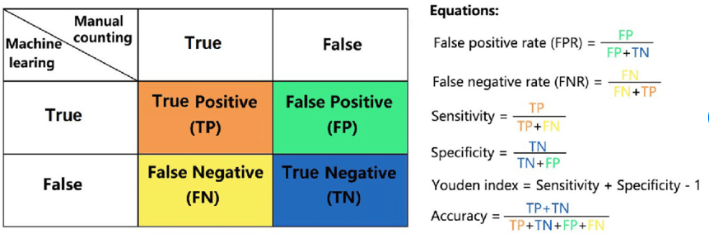

In [154]:
from IPython.display import Image

# Specify the path to your screenshot file
image_path = '/Users/staschernyshov/Desktop/conmatstats.png'

# Display the image
Image(filename=image_path)


,y_pred=0,y_pred=1,Total
,,,
y=0,54.0,430.0,484.0
y=1,48.0,557.0,605.0
Total,102.0,987.0,


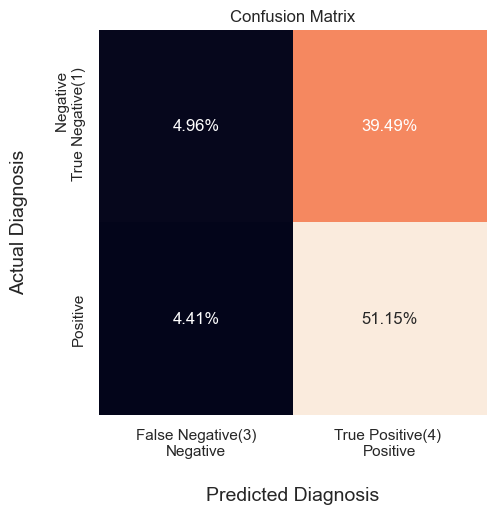

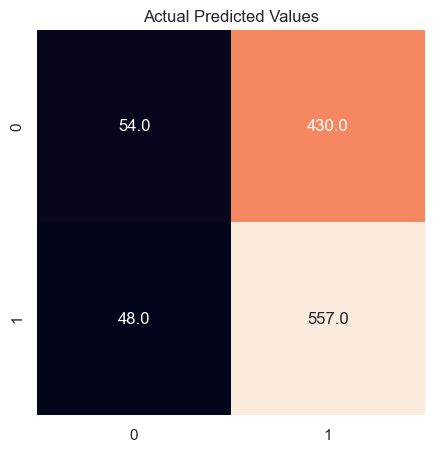

Fractions of predictions that are correct (Accuracy): 
0.56107


In [202]:
confusion_mtx=model_10b.pred_table(threshold=0.5)

display(confusion_table(confusion_mtx))
seaborn_confusion_matrix(confusion_mtx)

correct_rate(confusion_mtx)
# Compute fraction of predictions that are correct








In [156]:
classifier_stats(confusion_mtx)

prior_error_rate                         44.444444
total_error_rate                         43.893480
true_positive_rate (sensitivity)         92.066116
false_negative_rate                       7.933884
false_positive_rate                      88.842975
true_negative_rate (specificity)         11.157025
positive_predictive_value (precision)    56.433637
negative_predictive_value                52.941176
Accuracy                                 56.106520
dtype: float64

In [157]:
positive_observations(weekly_df['Direction_Up'])
negative_observations(weekly_df['Direction_Up'])


In [158]:
train_idx       = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test  = weekly_df.drop(train_idx)
y_test          = weekly_df_test['Direction_Up']


In [159]:
positive_observations(weekly_df_test['Direction_Up'])

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


,y_pred=0,y_pred=1,Total
,,,
y=0,9,34,43
y=1,5,56,61
Total,14,90,


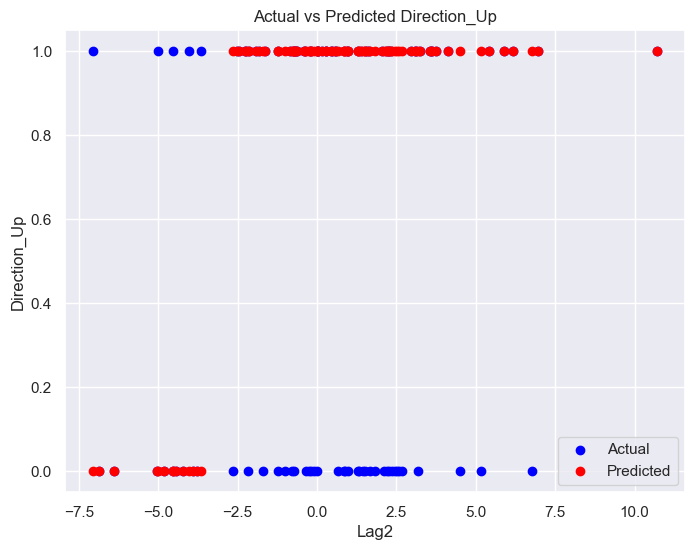

In [197]:
#fit the dodel
f_10d = 'Direction_Up ~ Lag2'
model_10d = smf.logit(formula=f_10d, data=weekly_df).fit()

#getting confusion matrix using test data
threshold     = 0.5
y_pred_logit  = (model_10d.predict(weekly_df_test) > threshold).astype(int)
confusion_mtx = confusion_matrix(y_test,y_pred_logit)

display(confusion_table(confusion_mtx))

#Classifier Stats
logit_stats=classifier_stats(confusion_mtx)
logit_stats

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weekly_df_test['Lag2'], y_test, color='blue', label='Actual')
plt.scatter(weekly_df_test['Lag2'], y_pred_logit, color='red', label='Predicted')
plt.xlabel('Lag2')
plt.ylabel('Direction_Up')
plt.title('Actual vs Predicted Direction_Up')
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt







,y_pred=0,y_pred=1,Total
,,,
y=0,9,34,43
y=1,5,56,61
Total,14,90,


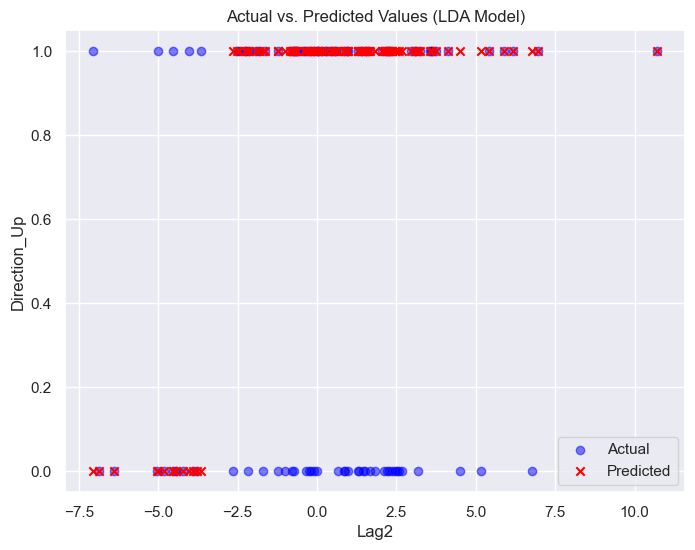

In [204]:
# Create hold-out sets
train_idx       = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test  = weekly_df.drop(train_idx)

# Segment predictors and responses
X_train = np.array(weekly_df_train['Lag2']).reshape(-1,1)
y_train = np.array(weekly_df_train['Direction_Up'])
X_test  = np.array(weekly_df_test['Lag2']).reshape(-1,1)
y_test  = np.array(weekly_df_test['Direction_Up'])

# What percentage of observations are in the direction_up class?
positive_observations(y_test)

# Fit model
lda = LinearDiscriminantAnalysis()
model_10e = lda.fit(X_train, y_train)

# Predict
y_pred_lda = model_10e.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_lda)
display(confusion_table(confusion_mtx))

# Compute fraction of predictions that are correct
correct_rate = 1 - total_error_rate(confusion_mtx)
display(HTML('<p><h4>{}%</h4> of test predictions correct</p>'.format(np.round(correct_rate*100, decimals=3))))

# Classifier stats
lda_stats = classifier_stats(confusion_mtx)
lda_stats

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for LDA model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred_lda, c='red', label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (LDA Model)')
plt.xlabel('Lag2')
plt.ylabel('Direction_Up')
plt.legend()
plt.show()




,y_pred=0,y_pred=1,Total
,,,
y=0,0,43,43
y=1,0,61,61
Total,0,104,


/var/folders/fr/xc9ysqcs5dl4yzbc_409395m0000gn/T/ipykernel_28704/1284199125.py:51: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])


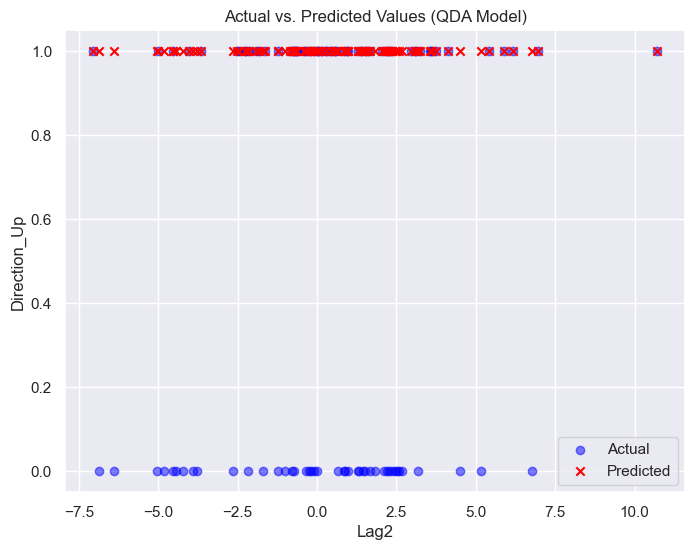

In [206]:
# Create hold-out sets
train_idx       = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test  = weekly_df.drop(train_idx)

# Segment predictors and responses
X_train = np.array(weekly_df_train['Lag2']).reshape(-1,1)
y_train = np.array(weekly_df_train['Direction_Up'])
X_test  = np.array(weekly_df_test['Lag2']).reshape(-1,1)
y_test  = np.array(weekly_df_test['Direction_Up'])

# What percentage of observations are in the direction_up class?
positive_observations(y_test)

# Fit model
qda = QuadraticDiscriminantAnalysis()
model_10f = qda.fit(X_train, y_train)
y_pred_qda = model_10f.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_qda)
display(confusion_table(confusion_mtx))



# Classifier stats
qda_stats = classifier_stats(confusion_mtx)
qda_stats

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for QDA model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred_qda, c='red', label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (QDA Model)')
plt.xlabel('Lag2')
plt.ylabel('Direction_Up')
plt.legend()
plt.show()




,y_pred=0,y_pred=1,Total
,,,
y=0,18,25,43
y=1,27,34,61
Total,45,59,


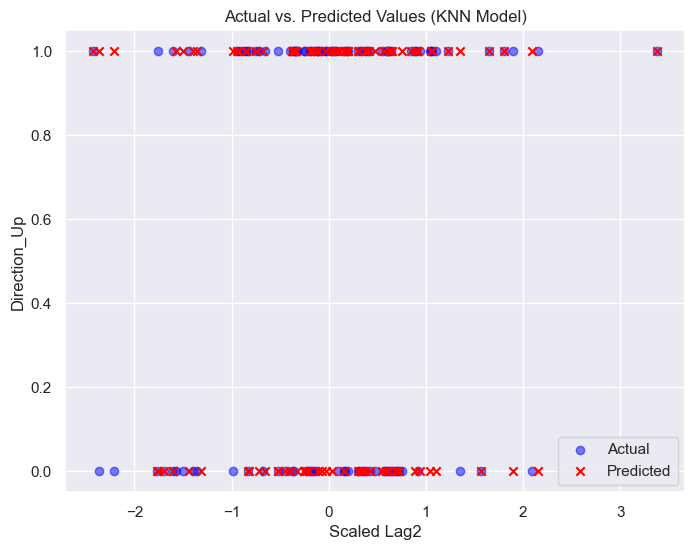

prior_error_rate                         41.346154
total_error_rate                         50.000000
true_positive_rate (sensitivity)         55.737705
false_negative_rate                      44.262295
false_positive_rate                      58.139535
true_negative_rate (specificity)         41.860465
positive_predictive_value (precision)    57.627119
negative_predictive_value                40.000000
Accuracy                                 50.000000
dtype: float64

In [207]:
from sklearn.neighbors import KNeighborsClassifier

# Create hold-out sets
train_idx       = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test  = weekly_df.drop(train_idx)

# Segment predictors and responses
X_train = preprocessing.scale(np.array(weekly_df_train['Lag2']).reshape(-1,1))
X_test  = preprocessing.scale(np.array(weekly_df_test['Lag2']).reshape(-1,1))
y_train = np.array(weekly_df_train['Direction_Up'])
y_test  = np.array(weekly_df_test['Direction_Up'])

# What percentage of observations are in the direction_up class?
positive_observations(y_train)

# Model
K = 1
model_10g = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
y_pred_knn = model_10g.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_knn)
display(confusion_table(confusion_mtx))

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred_knn, c='red', label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (KNN Model)')
plt.xlabel('Scaled Lag2')
plt.ylabel('Direction_Up')
plt.legend()
plt.show()



# Classifier stats
knn_stats = classifier_stats(confusion_mtx)
knn_stats


In [164]:
stats= pd.DataFrame({'lgit': logit_stats,
                     'lda' : lda_stats,
                     'qda'  : qda_stats,
                     'knn'  : knn_stats}).T
stats.T
                     
                    

,lgit,lda,qda,knn
prior_error_rate,41.346154,41.346154,41.346154,41.346154
total_error_rate,37.500000,37.500000,41.346154,50.000000
true_positive_rate (sensitivity),91.803279,91.803279,100.000000,55.737705
false_negative_rate,8.196721,8.196721,0.000000,44.262295
false_positive_rate,79.069767,79.069767,100.000000,58.139535
true_negative_rate (specificity),20.930233,20.930233,0.000000,41.860465
positive_predictive_value (precision),62.222222,62.222222,58.653846,57.627119
negative_predictive_value,64.285714,64.285714,NaN,40.000000
Accuracy,62.500000,62.500000,58.653846,50.000000


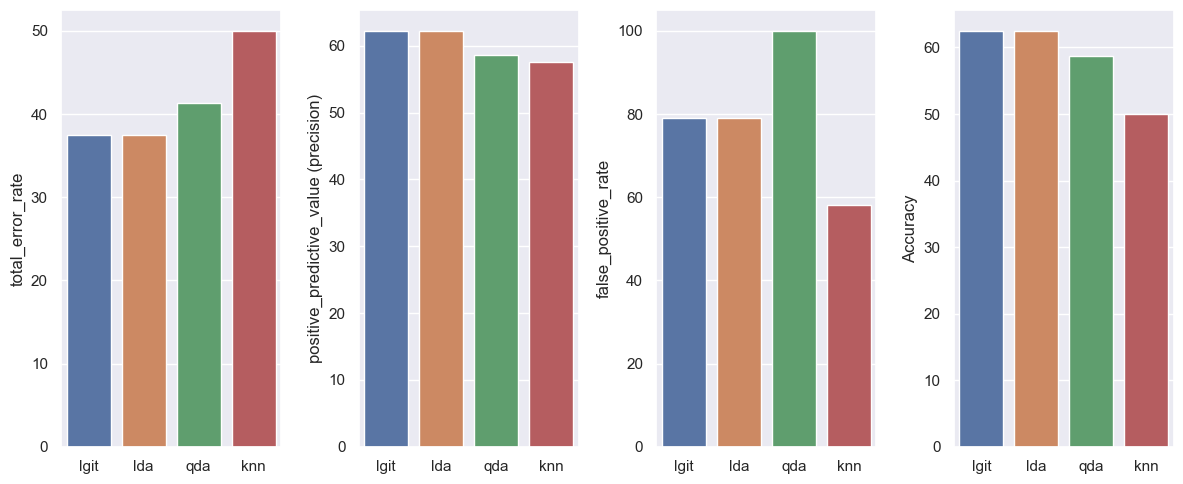

In [165]:
plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
ax1 = sns.barplot(x=stats.index, y=stats['total_error_rate'])
plt.subplot(1,4,2)
ax2 = sns.barplot(x=stats.index, y=stats['positive_predictive_value (precision)'])
plt.subplot(1,4,3)
ax = sns.barplot(x=stats.index, y=stats['false_positive_rate'])
plt.subplot(1,4,4)
ax = sns.barplot(x=stats.index, y=stats['Accuracy'])
plt.tight_layout()
plt.show()

In [192]:
# Create hold-out sets
train_idx       = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test  = weekly_df.drop(train_idx)

predictors  = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Year']
X_train = np.array(weekly_df_train[predictors])
X_test  = np.array(weekly_df_test[predictors])
y_train = np.array(weekly_df_train['Direction_Up'])
y_test  = np.array(weekly_df_test['Direction_Up'])

# MODELS
# Logistic Regression
#model_logit = sm.Logit(y_train, X_train).fit() <--- this technique didn't converge
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)
# LDA
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
# QDA
qda         = QuadraticDiscriminantAnalysis()
model_qda   = qda.fit(X_train, y_train)
# KNN_1
K = 1
model_knn_1 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_3
K = 3
model_knn_3 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_10
K = 10
model_knn_10 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)

models = {'logit': model_logit, 
          'lda': model_lda, 
          'qda': model_qda,
          'knn_1': model_knn_1,
         'knn_3': model_knn_3,
         'knn_10': model_knn_10}
scaled = ['knn_1', 'knn_3', 'knn_10']


# PREDICT
for k in models:
    # Predict
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    # Confusion table
    display(HTML('<h3>{}</h3>'.format(k)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx))
    
    




,y_pred=0,y_pred=1,Total
,,,
y=0,31,12,43
y=1,44,17,61
Total,75,29,


prior_error_rate                         41.346154
total_error_rate                         53.846154
true_positive_rate (sensitivity)         27.868852
false_negative_rate                      72.131148
false_positive_rate                      27.906977
true_negative_rate (specificity)         72.093023
positive_predictive_value (precision)    58.620690
negative_predictive_value                41.333333
Accuracy                                 46.153846
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,30,13,43
y=1,44,17,61
Total,74,30,


prior_error_rate                         41.346154
total_error_rate                         54.807692
true_positive_rate (sensitivity)         27.868852
false_negative_rate                      72.131148
false_positive_rate                      30.232558
true_negative_rate (specificity)         69.767442
positive_predictive_value (precision)    56.666667
negative_predictive_value                40.540541
Accuracy                                 45.192308
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,38,5,43
y=1,50,11,61
Total,88,16,


prior_error_rate                         41.346154
total_error_rate                         52.884615
true_positive_rate (sensitivity)         18.032787
false_negative_rate                      81.967213
false_positive_rate                      11.627907
true_negative_rate (specificity)         88.372093
positive_predictive_value (precision)    68.750000
negative_predictive_value                43.181818
Accuracy                                 47.115385
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,18,25,43
y=1,22,39,61
Total,40,64,


prior_error_rate                         41.346154
total_error_rate                         45.192308
true_positive_rate (sensitivity)         63.934426
false_negative_rate                      36.065574
false_positive_rate                      58.139535
true_negative_rate (specificity)         41.860465
positive_predictive_value (precision)    60.937500
negative_predictive_value                45.000000
Accuracy                                 54.807692
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,12,31,43
y=1,21,40,61
Total,33,71,


prior_error_rate                         41.346154
total_error_rate                         50.000000
true_positive_rate (sensitivity)         65.573770
false_negative_rate                      34.426230
false_positive_rate                      72.093023
true_negative_rate (specificity)         27.906977
positive_predictive_value (precision)    56.338028
negative_predictive_value                36.363636
Accuracy                                 50.000000
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,21,22,43
y=1,25,36,61
Total,46,58,


prior_error_rate                         41.346154
total_error_rate                         45.192308
true_positive_rate (sensitivity)         59.016393
false_negative_rate                      40.983607
false_positive_rate                      51.162791
true_negative_rate (specificity)         48.837209
positive_predictive_value (precision)    62.068966
negative_predictive_value                45.652174
Accuracy                                 54.807692
dtype: float64